In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings
%pylab inline
%load_ext autoreload
%autoreload 2
df = pd.read_csv('df.csv')
df["REPDTE"] = pd.to_datetime(df["REPDTE"], format="%Y-%m-%d").dt.date

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from helper import *

In [4]:
def banksShow(date):
    variables = ["Total Assets", "Securities", "Held to Maturity (Book Value)"]
    varCode = ["NAMEFULL"] + [name2code[name] for name in variables]
    df_2022_12 = df[df['REPDTE'] == date][varCode][:100]
    df_2022_12.columns = ["Bank"] + variables
    df_2022_12["Held to Maturity (Book Value)"] = df_2022_12["Held to Maturity (Book Value)"]/df_2022_12["Securities"]
    df_2022_12["Securities"] = df_2022_12["Securities"]/df_2022_12["Total Assets"]
    df_2022_12["Total Assets"] = df_2022_12["Total Assets"]/10**6
    dd = df_2022_12.sort_values(by=['Held to Maturity (Book Value)'],ascending=False).head(5).round(3).drop("Securities",axis=1).reset_index(drop=True)
    dd.index += 1
    print(dd.to_latex())

    dd = df_2022_12.sort_values(by=["Securities"],ascending=False).head(5).round(3).drop("Held to Maturity (Book Value)",axis=1).reset_index(drop=True)
    dd.index += 1
    print(dd.to_latex())
    
    return df_2022_12

In [5]:
df_2023_3 = banksShow(datetime.date(2023, 3, 31))

\begin{tabular}{llrr}
\toprule
{} &                                   Bank &  Total Assets &  Held to Maturity (Book Value) \\
\midrule
1 &                           UBS BANK USA &       113.867 &                          0.999 \\
2 &                    FIRST REPUBLIC BANK &       232.944 &                          0.910 \\
3 &  BANK OF AMERICA, NATIONAL ASSOCIATION &      2518.290 &                          0.818 \\
4 &                   VALLEY NATIONAL BANK &        64.314 &                          0.749 \\
5 &  MUFG UNION BANK, NATIONAL ASSOCIATION &        99.964 &                          0.737 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &                           Bank &  Total Assets &  Securities \\
\midrule
1 &       CHARLES SCHWAB BANK, SSB &       347.185 &       0.773 \\
2 &      USAA FEDERAL SAVINGS BANK &       110.977 &       0.523 \\
3 &   BANCO POPULAR DE PUERTO RICO &        55.618 &       0.450 \\
4 &                     FROST BANK &        51.28

/tmp/ipykernel_4101060/181478203.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())
/tmp/ipykernel_4101060/181478203.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())


In [6]:
df_2022_3 = banksShow(datetime.date(2022, 3, 31))

\begin{tabular}{llrr}
\toprule
{} &                                               Bank &  Total Assets &  Held to Maturity (Book Value) \\
\midrule
1 &                                FIRST REPUBLIC BANK &       187.121 &                          0.886 \\
2 &                                SILICON VALLEY BANK &       217.804 &                          0.792 \\
3 &              BANK OF AMERICA, NATIONAL ASSOCIATION &      2513.619 &                          0.723 \\
4 &             WELLS FARGO BANK, NATIONAL ASSOCIATION &      1764.272 &                          0.638 \\
5 &  MORGAN STANLEY PRIVATE BANK, NATIONAL ASSOCIATION &       203.508 &                          0.603 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &                           Bank &  Total Assets &  Securities \\
\midrule
1 &       CHARLES SCHWAB BANK, SSB &       434.627 &       0.758 \\
2 &            SILICON VALLEY BANK &       217.804 &       0.572 \\
3 &      USAA FEDERAL SAVINGS BANK &       11

/tmp/ipykernel_4101060/181478203.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())
/tmp/ipykernel_4101060/181478203.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())


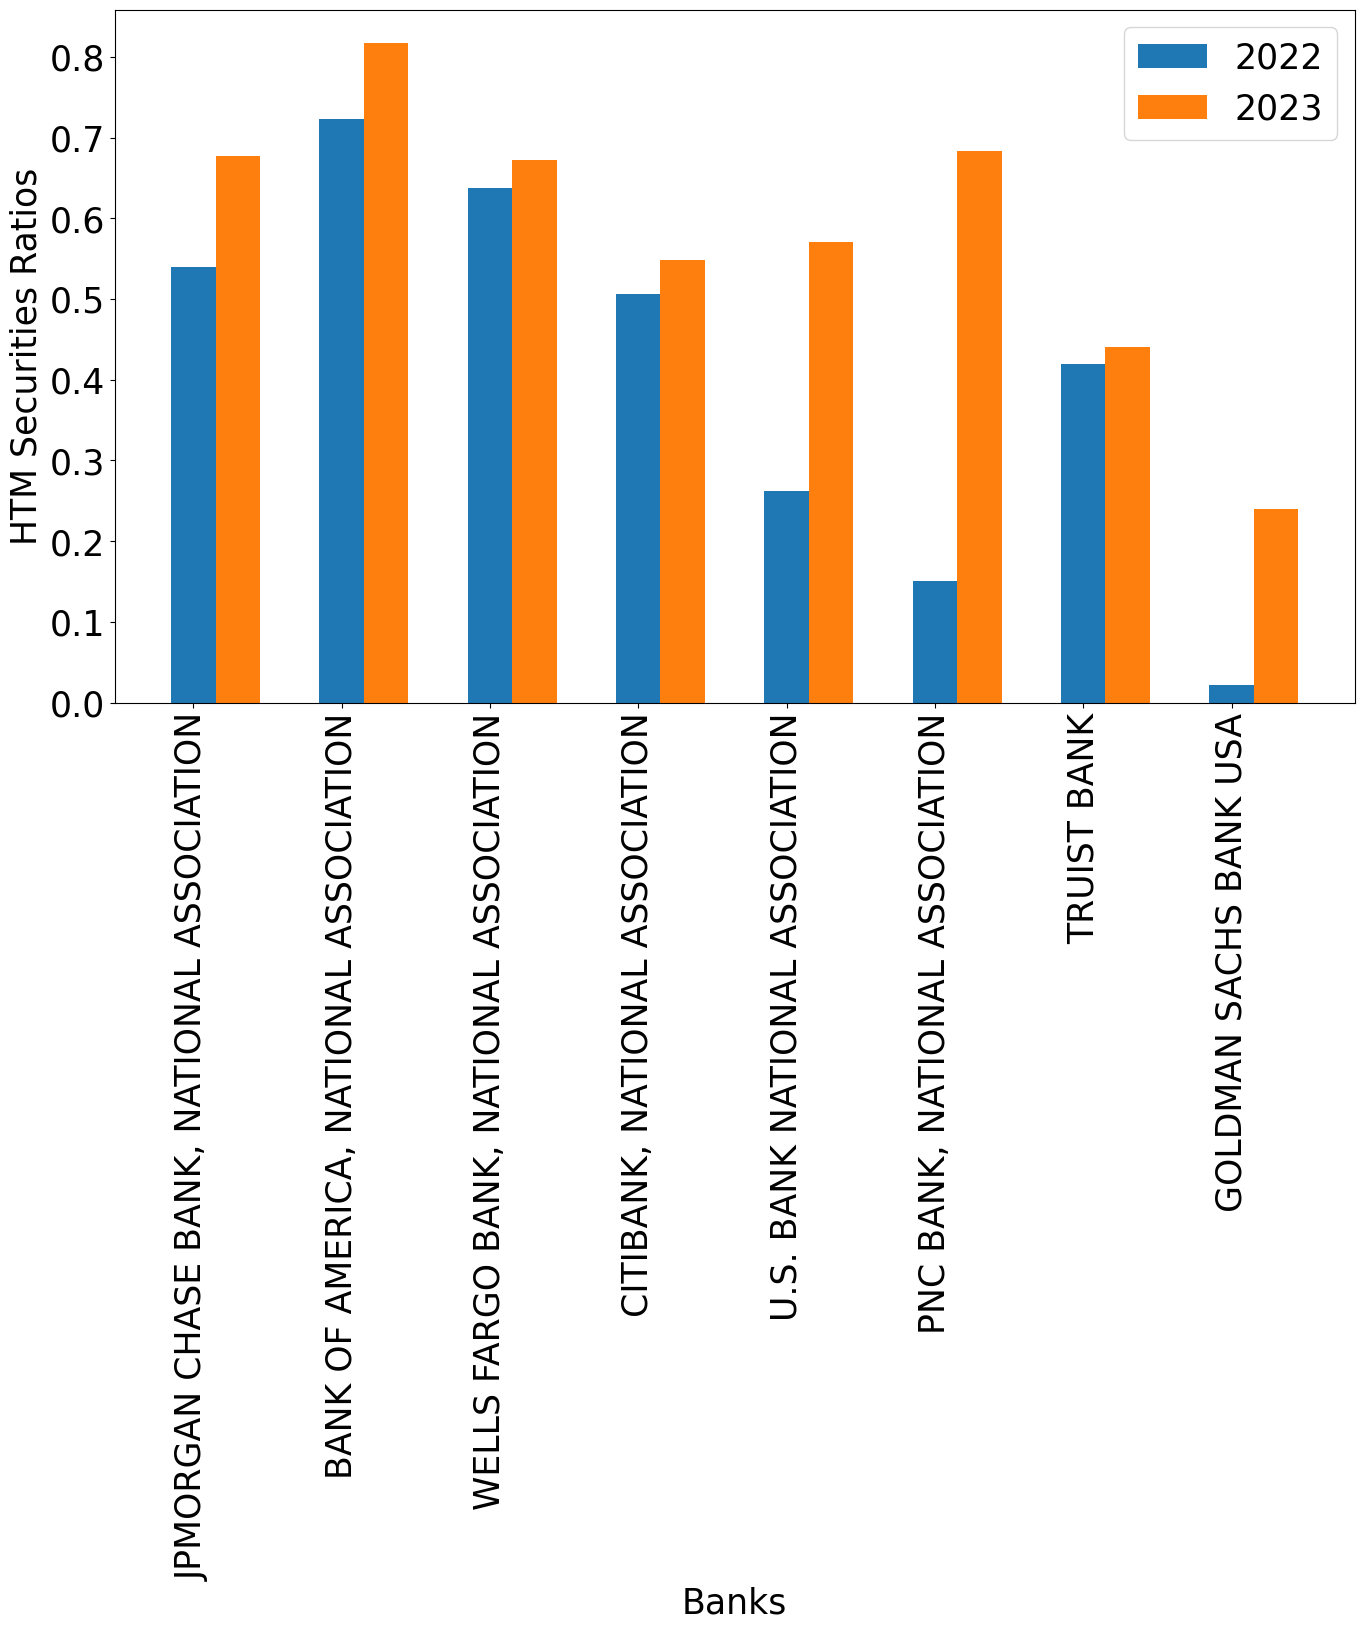

In [45]:
pylab.rcParams['figure.figsize'] = (16, 9)
pylab.rcParams['font.size'] = 25
d1,d2 = pairwiseComparison([2022,2023], [3,3], 9)

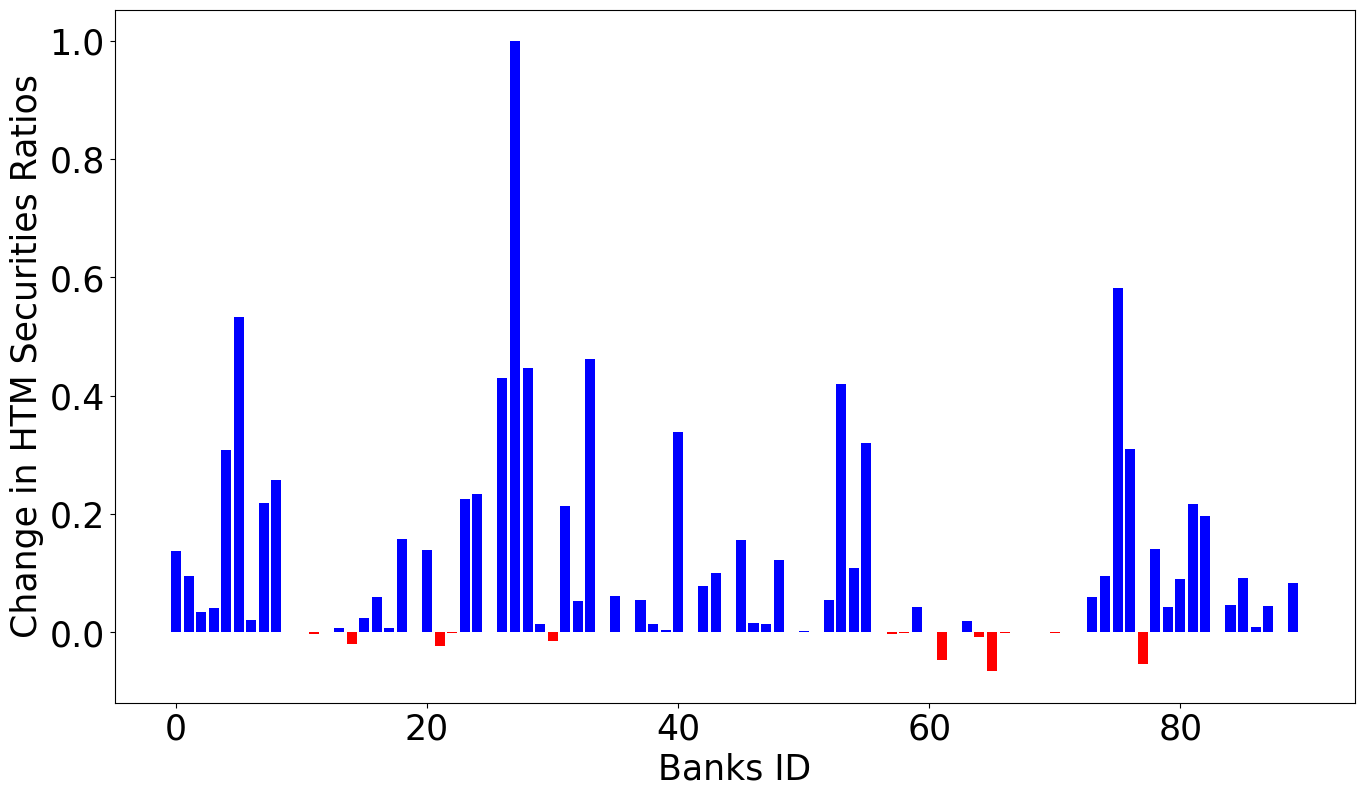

In [8]:
#plt.title("Change in Percentage of HTM holding from March 2022 to March 2023")
d1, d2 = pairwiseComparison([2022,2023], [3,3], 100, xlabel= False)

In [91]:
def varShow(date, variables = ["Total Assets", "Total Equity Capital"]):
    varCode = ["NAMEFULL"] + [name2code[name] for name in variables]
    df_2022_12 = df[df['REPDTE'] == date][varCode]
    df_2022_12.columns = ["Bank"] + variables
    return df_2022_12

In [56]:
def assetComparisonPlot(year1,year2):
    assets2001 = varShow(datetime.date(year1, 3, 31)).sort_values(by=["Total Assets"],ascending=False).head(20).reset_index(drop=True)["Total Assets"].values
    assets2023 = varShow(datetime.date(year2, 3, 31)).sort_values(by=["Total Assets"],ascending=False).head(20).reset_index(drop=True)["Total Assets"].values

    width = 0.30
    index = np.arange(len(assets2023))
    plt.bar(index, assets2001, width, label = str(year1))
    plt.bar(index+width, assets2023, width, label = str(year2))
    plt.xticks([])
    plt.xlabel("Top 20 Asset Holding Banks")
    plt.ylabel("Total Assets (in million)")
    plt.legend()

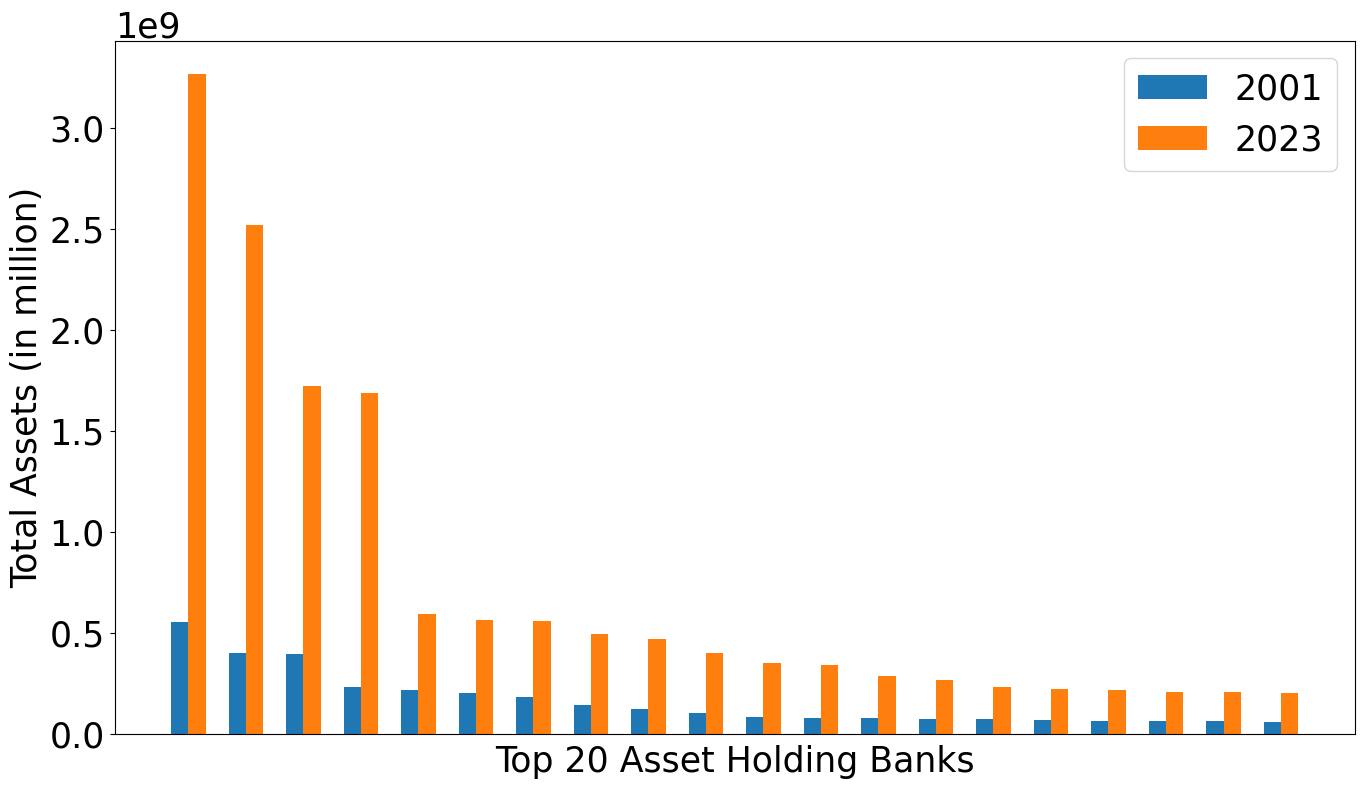

In [57]:
assetComparisonPlot(2001,2023)